# Lab - RNN

In [ ]:
import numpy as np
import tensorflow as tf

from datetime import datetime

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]  # hihell
y_data = [[1, 0, 2, 3, 3, 4]]  # ihello

num_classes = 5
input_dim = 5  # one-hot size, same as hidden_size to directly predict one-hot
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
                       [0, 1, 0, 0, 0],    # i 1
                       [1, 0, 0, 0, 0],    # h 0
                       [0, 0, 1, 0, 0],    # e 2
                       [0, 0, 0, 1, 0],    # l 3
                       [0, 0, 0, 1, 0]]],  # l 3
                     dtype=np.float32)

y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
print(x_one_hot.shape)
print(y_one_hot.shape)

tf.model = tf.keras.Sequential()

# make cell and add it to RNN layer
# input_shape = (1,6,5) => number of sequence (batch), length of sequence, size of input dim

# Basic RNN

tf.model.add(tf.keras.layers.SimpleRNN(units=5, activation='tanh', input_shape=(sequence_length, input_dim), return_sequences=True))

# fully connected layer
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                 metrics=['accuracy'])

# train
tf.model.fit(x_one_hot, y_one_hot, epochs=50)
tf.model.summary()


predictions = tf.model.predict(x_one_hot)
for i, prediction in enumerate(predictions):
    print(prediction)
    # print char using argmax, dict
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str))

print(tf.model.trainable_weights)




# LSTM

In [1]:

import numpy as np
import tensorflow as tf


idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
# x_data = [[0, 1, 0, 2, 3, 3]]  # hihell
y_data = [[1, 0, 2, 3, 3, 4]]  # ihello

num_classes = 5
input_dim = 5  # one-hot size, same as hidden_size to directly predict one-hot
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
                       [0, 1, 0, 0, 0],    # i 1
                       [1, 0, 0, 0, 0],    # h 0
                       [0, 0, 1, 0, 0],    # e 2
                       [0, 0, 0, 1, 0],    # l 3
                       [0, 0, 0, 1, 0]]],  # l 3
                     dtype=np.float32)

y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
print(x_one_hot.shape)
print(y_one_hot.shape)

tf.model = tf.keras.Sequential()

# make cell and add it to RNN layer
# input_shape = (1,6,5) => number of sequence (batch), length of sequence, size of input dim

#cell = tf.keras.layers.LSTMCell(units=num_classes, input_shape=(sequence_length, input_dim))
#tf.model.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))

# single LSTM layer can be used as well instead of creating LSTMCell
tf.model.add(tf.keras.layers.LSTM(units=num_classes, input_shape=(sequence_length, input_dim), return_sequences=True))

# fully connected layer
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                 metrics=['accuracy'])

# train
tf.model.fit(x_one_hot, y_one_hot, epochs=50)
tf.model.summary()

predictions = tf.model.predict(x_one_hot)
for i, prediction in enumerate(predictions):
    print(prediction)
    # print char using argmax, dict
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str))

print(tf.model.trainable_weights)


(1, 6, 5)
(1, 6, 5)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.6020 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 1.6008 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 1.5997 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 1.5986 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 1.5975 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 1.5964 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 1.5953 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 1.5942 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 1.5931 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 1.5920 - accuracy: 0.5000
Epoch 11/50
1/1 [==============

# Lab - Character Sequence RNN

In [ ]:

import tensorflow as tf
import numpy as np

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

x_one_hot_eager = tf.one_hot(x_data, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
x_one_hot_numpy = tf.keras.utils.to_categorical(x_data, num_classes)  # it'll generate numpy array, either way works
y_one_hot_eager = tf.one_hot(y_data, num_classes)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.
             LSTM(units=num_classes, input_shape=(sequence_length, x_one_hot_eager.shape[2]), return_sequences=True))
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
tf.model.summary()
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                 metrics=['accuracy'])
tf.model.fit(x_one_hot_eager, y_one_hot_eager, epochs=50)


predictions = tf.model.predict(x_one_hot_eager)

for i, prediction in enumerate(predictions):
    # print char using argmax, dict
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str))


# Lab - Sentences

In [ ]:
import tensorflow as tf
import numpy as np

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

# One-hot encoding
X_one_hot = tf.one_hot(dataX, num_classes)
Y_one_hot = tf.one_hot(dataY, num_classes)

print(X_one_hot.shape)  # check out the shape (170, 10, 25)
print(Y_one_hot.shape)  # check out the shape


tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.
             LSTM(units=num_classes, input_shape=(sequence_length, X_one_hot.shape[2]), return_sequences=True))
tf.model.add(tf.keras.layers.LSTM(units=num_classes, return_sequences=True))
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
tf.model.summary()
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                 metrics=['accuracy'])
tf.model.fit(X_one_hot, Y_one_hot, epochs=100)


results = tf.model.predict(X_one_hot)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

# Cf) bag of words


# Stock prediction

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]] -> [0.11480508]
[[0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]
 [0.12220255 0.12138537 0.12372168 0.16807385 0.11480508]] -> [0.08319064]
[[0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]
 [0.12220255 0.12138537 0.12372168 0.16807385 0.11480508]
 [0.09611997 0.09773711 0.09973633 0.18754145 0.08319064]] -> [0.08660558]
[[0.18685758 0.18212236 0.1560484  0.609626

Epoch 1/500
16/16 [==============================] - 1s 4ms/step - loss: 0.3100
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2530
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.1692
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1425
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1221
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0973
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0892
Epoch 10/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 11/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 12/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 13/500
16/16 [=================

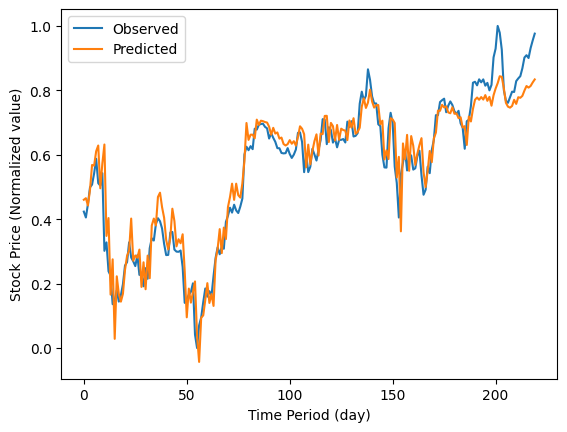

[<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(5, 1) dtype=float32, numpy=
array([[ 0.14399336],
       [ 0.5413799 ],
       [-0.67906237],
       [-0.1396706 ],
       [-0.9384889 ]], dtype=float32)>, <tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.28664476]], dtype=float32)>, <tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(1,) dtype=float32, numpy=array([0.2249833], dtype=float32)>, <tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.8783816]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.2242099], dtype=float32)>]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]  # Next close price
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape)  # (505, 7, 5)
print(trainY.shape)

# trainY[0] == trainX[1][-1][-1] ???

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.SimpleRNN(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations)

# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY, label='Observed')
plt.plot(test_predict, label='Predicted')
plt.xlabel("Time Period (day)")
plt.ylabel("Stock Price (Normalized value)")
plt.legend()
plt.show()

print(tf.model.trainable_weights)
